# 基于NLP+STEAM的语文项目式学习应用研究

参考链接：https://zhuanlan.zhihu.com/p/265100275

In [41]:
import pandas as pd
import jieba
import jieba.posseg as pseg
from imageio import imread
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [35]:
import os
from os.path import join
# 获取项目路径
current_folder_path = os.path.dirname(os.path.realpath('__file__'))
# file要加引号 https://www.cnblogs.com/yifanrensheng/p/13979063.html
# 获取数据存放目录路径
data_path = join(current_folder_path, '经整理后的数据.csv')
print(data_path)


/Users/kakawu/Laptop/laptop inbox/github_file/xtwgyxx_AICourse/005_21年秋_课堂笔记/211019项目式学习/经整理后的数据.csv


In [39]:
# 过滤词长，过滤停用词，只保留中文
STOP_WORDS = set([w.strip() for w in open("stopwords.txt").readlines()])

def is_fine_word(word, min_length=2):
    rule = re.compile(r"^[\u4e00-\u9fa5]+$")
    if len(word) >= min_length and word not in STOP_WORDS and re.search(rule, word):
        return True
    else:
        return False

def single_word(line):
    seg = jieba.posseg.cut(line)
    res = []
    for i in seg:
        if i.flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"] and is_fine_word(i.word):
            res.append(i.word)
    return res

#统计频率
def count_freq(df):
    wordlist=[]
    for i in df.cut:
        for j in i:
            wordlist.append(j)
    # print(wordlist)
    cfreq=pd.Series(wordlist).value_counts()
    print(cfreq)
    # cfreq=cfreq.to_dict()
    return cfreq

def draw_cloud(mask_path, word_freq, save_path):
    mask = imread(mask_path)
    wc = WordCloud(font_path='kaiti.TTF',  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=600,  # 词云显示的最大词数
                   mask=mask,  # 设置背景图片
                   scale=2,
                   max_font_size=85,  # 字体最大值
                   # random_state=42,
                   )
    wc.generate_from_frequencies(word_freq)

    # show
    image_colors = ImageColorGenerator(mask)
    plt.figure()
    plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    wc.to_file(save_path)
    plt.show()
    return wc

父亲     199
母亲     178
孩子     154
老师     134
地方     113
      ... 
握别       1
石岸       1
唱红       1
咬住       1
吴广皆      1
Length: 16187, dtype: int64


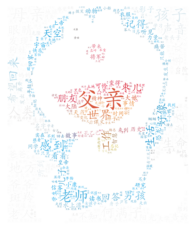

In [42]:
def DataAnalysis():
    df = pd.read_csv(data_path, 'r', delimiter=',', error_bad_lines=False)
    df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
    df_content=df.copy()[:]
    df_content['cut'] = df_content['content'].map(lambda x:single_word(str(x)))
    """wordcloud 
    1.统计词频；
    2.画图
    """
    cfreq=count_freq(df_content)#1.统计词频；
    cfreq=cfreq.to_dict()
    with open("cfreq.txt",'w',encoding='utf-8') as f:
        for k,v in cfreq.items():
            f.write(str(k)+ ' '+str(v)+'\n')
    f.close()

    file1 = join(current_folder_path,  '所有年级词云_Student.png')
    # tools.draw_cloud("data/caiyun.jpeg", cfreq, file1)  # 云朵
    draw_cloud("dlam.jpeg", cfreq, file1)  # 哆啦A梦

    # tools.draw_cloud("data/img.png",cfreq,"output/chinaw.png") #彩云


DataAnalysis()